In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
from tensorflow import keras
from keras.utils import to_categorical
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.optimizers import Adam
import os
import cv2
import random
import numpy as np
from PIL import Image, ImageOps
import seaborn as sn
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

from scipy import misc
import glob
import matplotlib.pyplot as plt
import scipy.misc
from matplotlib.pyplot import imshow
from IPython.display import SVG
import pickle
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
from keras.utils import layer_utils, np_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
from keras import losses
import keras.backend as K
from keras.callbacks import ModelCheckpoint






In [ ]:
def crearDatasetEntrenamiento():
    for categoria in CATEGORIAS:
        path = os.path.join(DATA_ENTRENAMIENTO, categoria)
        clase = CATEGORIAS.index(categoria)
        for imagen in os.listdir(path):
            imagen_array = cv2.imread(os.path.join(path, imagen))
            datos_entrenamiento.append([imagen_array, clase])

In [ ]:
def crearDatasetValidacion():
    for categoria in CATEGORIAS:
        path = os.path.join(DATA_VALIDACION, categoria)
        clase = CATEGORIAS.index(categoria)
        for imagen in os.listdir(path):
            imagen_array = cv2.imread(os.path.join(path, imagen))
            datos_test.append([imagen_array, clase])

In [ ]:
DATA_ENTRENAMIENTO="/content/drive/MyDrive/TESIS!!!!!/Proyecto/Data/Entrenamiento"

CATEGORIAS=["In","Pa","Ps","RS","Sc","cr"]

datos_entrenamiento=[]
crearDatasetEntrenamiento()
random.shuffle(datos_entrenamiento)
X_train = []
y_train = []

for imagen, etiqueta in datos_entrenamiento:
    X_train.append(imagen)
    y_train.append(etiqueta)

X_train = np.array(X_train)
y_train = np.array(y_train)

print(type(X_train))
print(X_train.shape)
print(y_train.shape)

print('----------------------------------------')
######################################################

DATA_VALIDACION="/content/drive/MyDrive/TESIS!!!!!/Proyecto/Data/Validacion"

datos_test = []

crearDatasetValidacion()
random.shuffle(datos_test)
X_test = []
y_test = []

for imagen, etiqueta in datos_test:
    X_test.append(imagen)
    y_test.append(etiqueta)


X_test = np.array(X_test)
y_test = np.array(y_test)
print(type(X_test))
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(1265, 200, 200, 3)
(1265,)
----------------------------------------
<class 'numpy.ndarray'>
(535, 200, 200, 3)
(535,)


In [ ]:
unicos, cantidad = np.unique(y_test, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad: {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5], y a cada número le corresponde la siguente cantidad: [85 90 90 90 90 90]


In [ ]:
unicos, cantidad = np.unique(y_train, return_counts = True)

print(f'El dataset posee imágenes de los siguentes números: {unicos}, y a cada número le corresponde la siguente cantidad: {cantidad}')

El dataset posee imágenes de los siguentes números: [0 1 2 3 4 5], y a cada número le corresponde la siguente cantidad: [215 210 210 210 210 210]


In [ ]:
#Funcion de rotacion
def rotacion(imagen, angulo):
    imagen = Image.fromarray(imagen)
    imagen_rotada = imagen.rotate(angle = angulo, expand = False)
    return np.array(imagen_rotada)

In [ ]:
#Voltear imagen
def flip (imagen):
  imagen = Image.fromarray(imagen)
  imagen_flip=ImageOps.flip(imagen)
  return np.array(imagen_flip)

In [ ]:
#Aumento de datos
def aumentacion(imagenes, etiquetas):
    lista_imagenes = []
    lista_etiquetas = []
    
    for i in range(imagenes.shape[0]):
        
        imagen, etiqueta = imagenes[i], etiquetas[i]

        lista_imagenes.append(imagen)
        lista_etiquetas.append(etiqueta)


        lista_imagenes.append(flip(imagen))
        lista_etiquetas.append(etiqueta)


        lista_imagenes.append(rotacion(imagen, 5))
        lista_etiquetas.append(etiqueta)    

        lista_imagenes.append(rotacion(imagen, -5))
        lista_etiquetas.append(etiqueta)


        
    list_aux = list(zip(lista_imagenes, lista_etiquetas))

    random.shuffle(list_aux)

    lista_imagenes, lista_etiquetas = zip(*list_aux)
    
    return np.asarray(lista_imagenes), np.asarray(lista_etiquetas)

In [ ]:
X_train, y_train = aumentacion(X_train, y_train)

print(X_train.shape, y_train.shape)

(5060, 200, 200, 3) (5060,)


In [ ]:
##Caraga de datos
#(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
#Procesamiento de datos
y_train_c = to_categorical(y_train)
y_test_c = to_categorical(y_test)

print (y_train_c)
print('------------------')
print (y_test_c)

[[0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]
------------------
[[0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]]


In [ ]:
#Estructura Neuronal 
# capa de entrada 
Imagen_de_entrada = layers.Input(shape = (200, 200, 3))


#Capa de comvolucion
#X = layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = None)(Imagen_de_entrada)
X = layers.Conv2D(filters = 4, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(Imagen_de_entrada)

#Capa de Normalizacion
X = layers.BatchNormalization()(X)
#Capa de activacion
X = layers.Activation("relu")(X)



#Capa de Max Pooling
X = layers.MaxPooling2D(pool_size = (2, 2))(X)
#######

#Definicion de otra capa de filtrado
#X = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = None)(X)
X = layers.Conv2D(filters = 4, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(X)


X = layers.BatchNormalization()(X)
  
X = layers.Activation("relu")(X)

X = layers.MaxPooling2D(pool_size = (2, 2))(X)

#Definicion de otra capa de filtrado
#X = layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = None)(X)
X = layers.Conv2D(filters = 8, kernel_size = (3, 3), 
                  activation = None, 
                  kernel_regularizer = keras.regularizers.l2(0.01))(X)

X = layers.BatchNormalization()(X)
  
X = layers.Activation("relu")(X)

X = layers.MaxPooling2D(pool_size = (2, 2))(X)


# Capa Flatten
Flatten = layers.Flatten()(X)

#Capa red fully conected
X = layers.Dense(500, activation = "sigmoid")(Flatten)
X = layers.Dropout(0.5)(X)

X = layers.Dense(500, activation = "sigmoid")(X)

X = layers.Dropout(0.5)(X)

Salida = layers.Dense(units = 6, activation = 'softmax')(X)

#Modelo Keras
Red_Neuronal = keras.Model(inputs = Imagen_de_entrada, outputs = Salida)

#compilacion del modelo
Red_Neuronal.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr=1.0e-4), metrics = ['accuracy'])
#Red_Neuronal.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

Historia = Red_Neuronal.fit(x = X_train, y = y_train_c, epochs = 80, batch_size = 32, validation_data = (X_test, y_test_c))

Epoch 1/80
159/159 [==============================] - 3s 15ms/step - loss: 1.8211 - accuracy: 0.3117 - val_loss: 1.5137 - val_accuracy: 0.3495
Epoch 2/80
159/159 [==============================] - 2s 14ms/step - loss: 1.0348 - accuracy: 0.6348 - val_loss: 0.7581 - val_accuracy: 0.7869
Epoch 3/80
159/159 [==============================] - 2s 14ms/step - loss: 0.8342 - accuracy: 0.7099 - val_loss: 0.6096 - val_accuracy: 0.7664
Epoch 4/80
159/159 [==============================] - 2s 14ms/step - loss: 0.7192 - accuracy: 0.7616 - val_loss: 0.6535 - val_accuracy: 0.7701
Epoch 5/80
159/159 [==============================] - 2s 14ms/step - loss: 0.6366 - accuracy: 0.7936 - val_loss: 0.6325 - val_accuracy: 0.7701
Epoch 6/80
159/159 [==============================] - 2s 14ms/step - loss: 0.6005 - accuracy: 0.8127 - val_loss: 0.4343 - val_accuracy: 0.8617
Epoch 7/80
159/159 [==============================] - 2s 14ms/step - loss: 0.5629 - accuracy: 0.8259 - val_loss: 0.4403 - val_accuracy: 0.8486

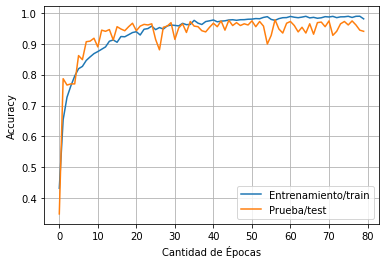

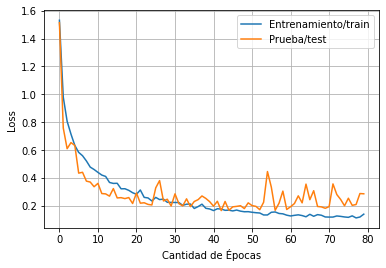

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 198, 198, 4)       112       
_________________________________________________________________
batch_normalization_3 (Batch (None, 198, 198, 4)       16        
_________________________________________________________________
activation_3 (Activation)    (None, 198, 198, 4)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 99, 99, 4)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 97, 97, 4)         148       
_________________________________________________________________
batch_normalization_4 (Batch (None, 97, 97, 4)         16  

In [ ]:

plt.figure(0)
plt.plot(Historia.history['accuracy'], label = 'Entrenamiento/train')
plt.plot(Historia.history['val_accuracy'], label = 'Prueba/test')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Accuracy')
plt.legend()


plt.figure(2)
plt.plot(Historia.history['loss'], label = 'Entrenamiento/train')
plt.plot(Historia.history['val_loss'], label = 'Prueba/test')
plt.grid()
plt.xlabel('Cantidad de Épocas')
plt.ylabel('Loss')
plt.legend()

plt.show()


Red_Neuronal.summary()

In [ ]:
Predicciones_MNIST = Red_Neuronal.predict(X_train)
#np.round(Predicciones_MNIST[0:70], decimals = 3)

----------------------------------
La posición de la imagen a mostrar es la 2991
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.002 0.    0.001 0.003 0.995 0.   ]


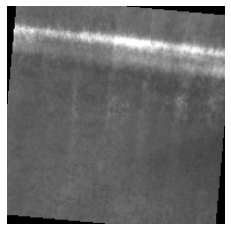

----------------------------------
La posición de la imagen a mostrar es la 636
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.005 0.    0.    0.027 0.968 0.   ]


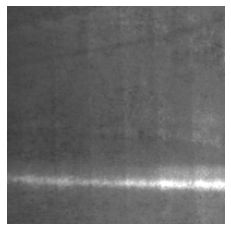

----------------------------------
La posición de la imagen a mostrar es la 2271
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.003 0.    0.    0.    0.996 0.   ]


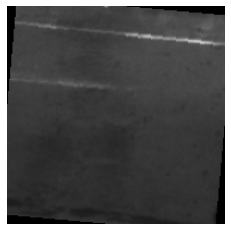

----------------------------------
La posición de la imagen a mostrar es la 3372
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


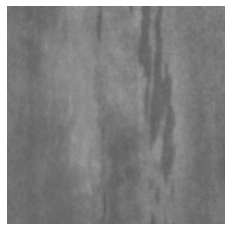

----------------------------------
La posición de la imagen a mostrar es la 3828
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


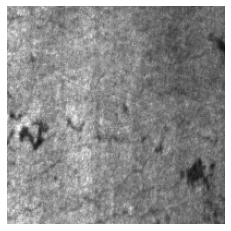

----------------------------------
La posición de la imagen a mostrar es la 4930
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.991 0.    0.    0.    0.009]


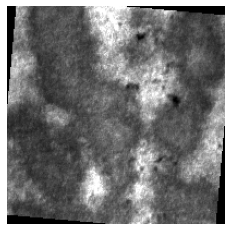

----------------------------------
La posición de la imagen a mostrar es la 1155
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.997 0.    0.    0.    0.003]


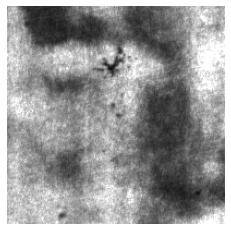

----------------------------------
La posición de la imagen a mostrar es la 3993
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


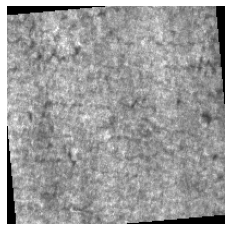

----------------------------------
La posición de la imagen a mostrar es la 3543
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


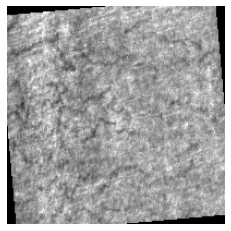

----------------------------------
La posición de la imagen a mostrar es la 2475
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.998 0.    0.    0.    0.002]


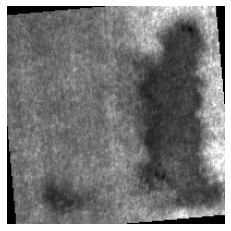

----------------------------------
La posición de la imagen a mostrar es la 1545
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


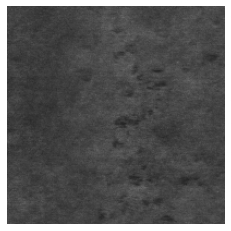

----------------------------------
La posición de la imagen a mostrar es la 3694
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.147 0.    0.853 0.    0.    0.   ]


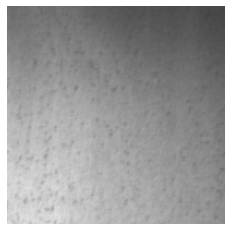

----------------------------------
La posición de la imagen a mostrar es la 4508
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.989 0.    0.    0.    0.011]


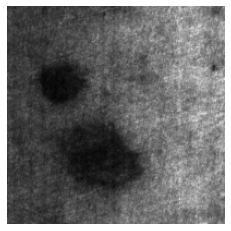

----------------------------------
La posición de la imagen a mostrar es la 745
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


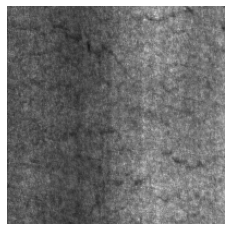

----------------------------------
La posición de la imagen a mostrar es la 1769
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


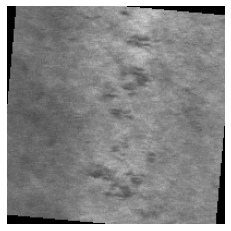

----------------------------------
La posición de la imagen a mostrar es la 3033
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


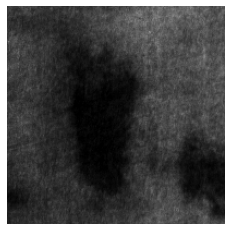

----------------------------------
La posición de la imagen a mostrar es la 2895
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0.    0.    0.    0.001 0.    0.999]


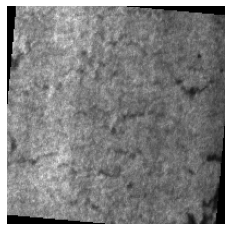

----------------------------------
La posición de la imagen a mostrar es la 838
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


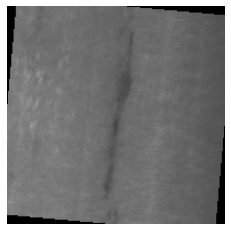

----------------------------------
La posición de la imagen a mostrar es la 2565
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0.]


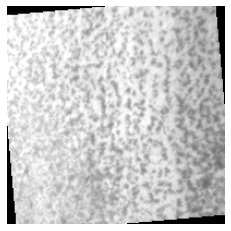

----------------------------------
La posición de la imagen a mostrar es la 4933
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


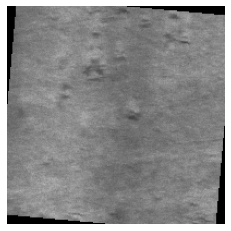

----------------------------------
La posición de la imagen a mostrar es la 4161
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.002 0.    0.998 0.    0.    0.   ]


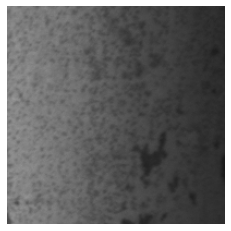

----------------------------------
La posición de la imagen a mostrar es la 561
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


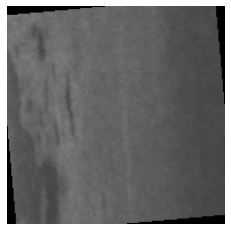

----------------------------------
La posición de la imagen a mostrar es la 1906
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


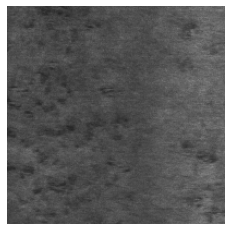

----------------------------------
La posición de la imagen a mostrar es la 2579
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


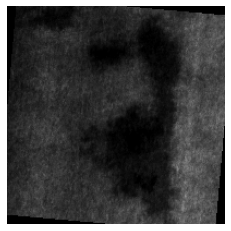

----------------------------------
La posición de la imagen a mostrar es la 1964
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.974 0.    0.    0.    0.026]


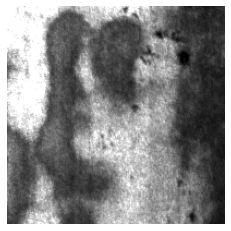

----------------------------------
La posición de la imagen a mostrar es la 423
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


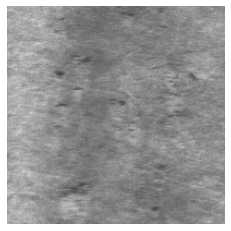

----------------------------------
La posición de la imagen a mostrar es la 4645
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.999 0.    0.    0.    0.    0.   ]


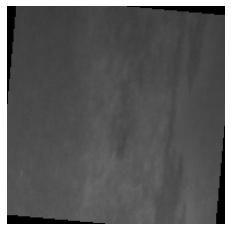

----------------------------------
La posición de la imagen a mostrar es la 2185
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0.]


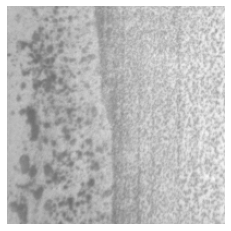

----------------------------------
La posición de la imagen a mostrar es la 1680
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.002 0.    0.998 0.    0.    0.   ]


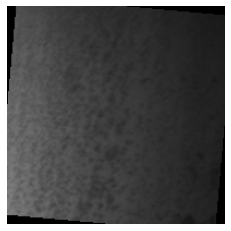

----------------------------------
La posición de la imagen a mostrar es la 2441
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.    0.    0.999 0.    0.    0.   ]


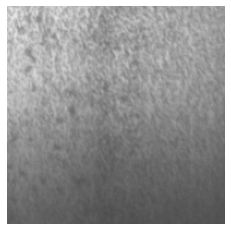

----------------------------------
La posición de la imagen a mostrar es la 3630
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


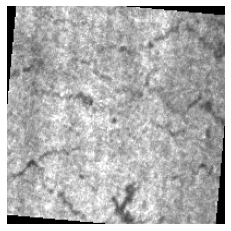

----------------------------------
La posición de la imagen a mostrar es la 1661
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


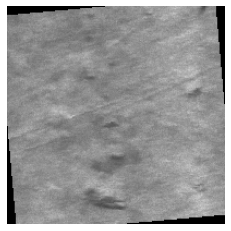

----------------------------------
La posición de la imagen a mostrar es la 54
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


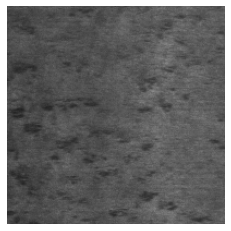

----------------------------------
La posición de la imagen a mostrar es la 3694
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.147 0.    0.853 0.    0.    0.   ]


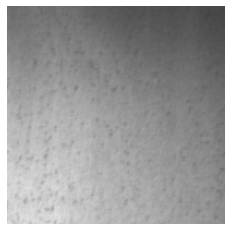

----------------------------------
La posición de la imagen a mostrar es la 1831
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


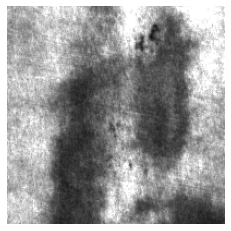

----------------------------------
La posición de la imagen a mostrar es la 4156
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


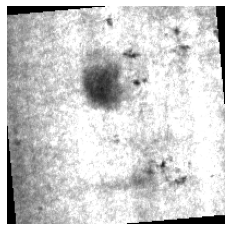

----------------------------------
La posición de la imagen a mostrar es la 4160
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0.]


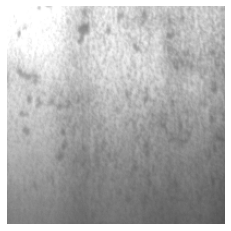

----------------------------------
La posición de la imagen a mostrar es la 4535
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.012 0.    0.012 0.008 0.968 0.   ]


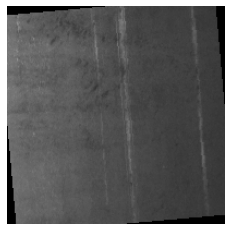

----------------------------------
La posición de la imagen a mostrar es la 3770
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


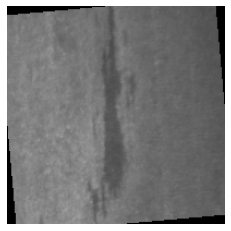

----------------------------------
La posición de la imagen a mostrar es la 1420
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.047 0.    0.953 0.    0.    0.   ]


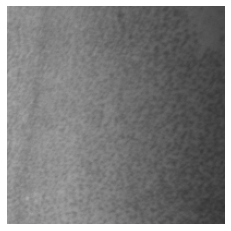

----------------------------------
La posición de la imagen a mostrar es la 3069
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0. 0. 0. 0. 1. 0.]


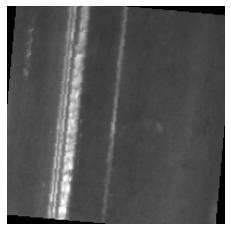

----------------------------------
La posición de la imagen a mostrar es la 3720
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.027 0.    0.973 0.    0.    0.   ]


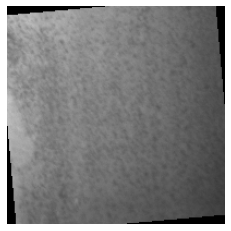

----------------------------------
La posición de la imagen a mostrar es la 4288
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0.001 0.    0.999 0.    0.    0.   ]


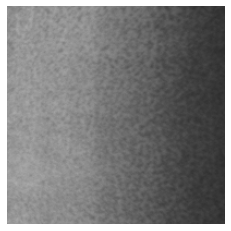

----------------------------------
La posición de la imagen a mostrar es la 4741
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


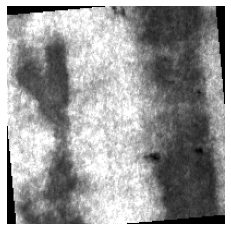

----------------------------------
La posición de la imagen a mostrar es la 1477
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.998 0.    0.    0.    0.002]


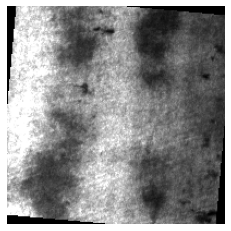

----------------------------------
La posición de la imagen a mostrar es la 2918
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


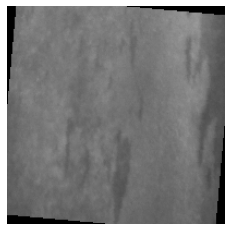

----------------------------------
La posición de la imagen a mostrar es la 3188
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0. 0. 0. 0. 1. 0.]


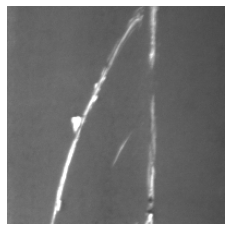

----------------------------------
La posición de la imagen a mostrar es la 3129
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.994 0.    0.001 0.    0.005 0.   ]


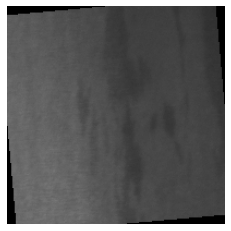

----------------------------------
La posición de la imagen a mostrar es la 2159
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


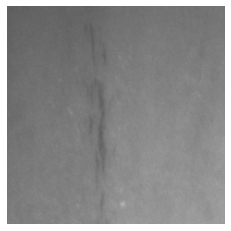

----------------------------------
La posición de la imagen a mostrar es la 1271
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


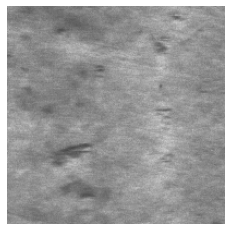

----------------------------------
La posición de la imagen a mostrar es la 4480
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


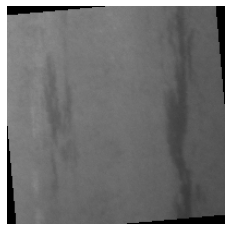

----------------------------------
La posición de la imagen a mostrar es la 4505
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0.]


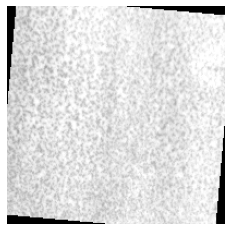

----------------------------------
La posición de la imagen a mostrar es la 4608
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


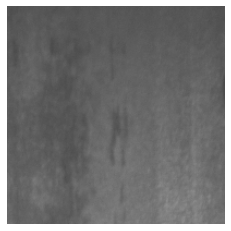

----------------------------------
La posición de la imagen a mostrar es la 1444
La etiqueta de la imagen es: 4
Etiqueta: [0. 0. 0. 0. 1. 0.]
Predicción: [0.64  0.    0.024 0.    0.336 0.   ]


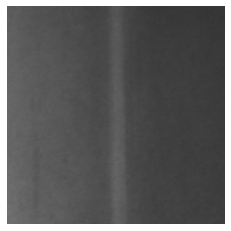

----------------------------------
La posición de la imagen a mostrar es la 3070
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.994 0.    0.    0.    0.005]


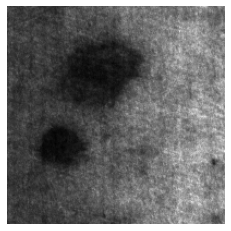

----------------------------------
La posición de la imagen a mostrar es la 1474
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


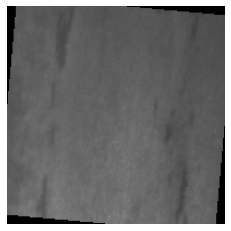

----------------------------------
La posición de la imagen a mostrar es la 4973
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0.]


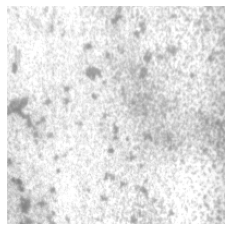

----------------------------------
La posición de la imagen a mostrar es la 1794
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


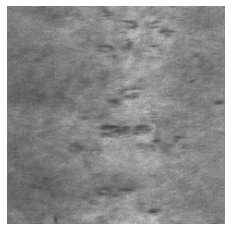

----------------------------------
La posición de la imagen a mostrar es la 965
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


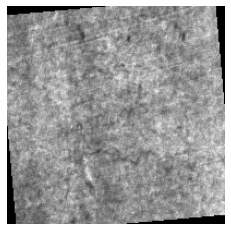

----------------------------------
La posición de la imagen a mostrar es la 341
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


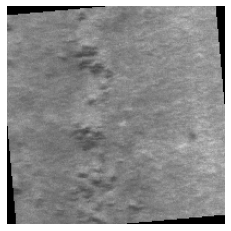

----------------------------------
La posición de la imagen a mostrar es la 527
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0.    0.999 0.    0.    0.    0.001]


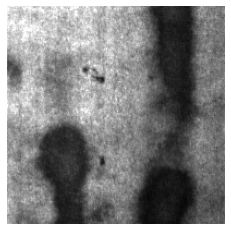

----------------------------------
La posición de la imagen a mostrar es la 1486
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


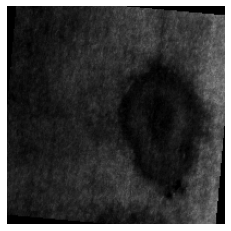

----------------------------------
La posición de la imagen a mostrar es la 3885
La etiqueta de la imagen es: 1
Etiqueta: [0. 1. 0. 0. 0. 0.]
Predicción: [0. 1. 0. 0. 0. 0.]


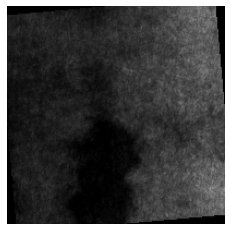

----------------------------------
La posición de la imagen a mostrar es la 2193
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.999 0.    0.001 0.    0.    0.   ]


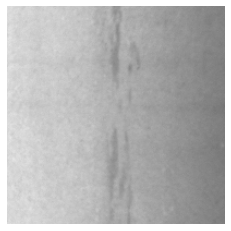

----------------------------------
La posición de la imagen a mostrar es la 1312
La etiqueta de la imagen es: 5
Etiqueta: [0. 0. 0. 0. 0. 1.]
Predicción: [0. 0. 0. 0. 0. 1.]


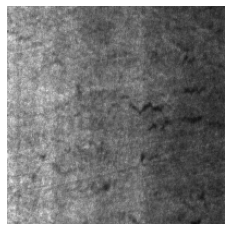

----------------------------------
La posición de la imagen a mostrar es la 365
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [0.995 0.    0.001 0.    0.005 0.   ]


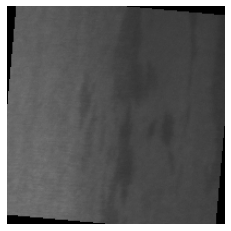

----------------------------------
La posición de la imagen a mostrar es la 2815
La etiqueta de la imagen es: 2
Etiqueta: [0. 0. 1. 0. 0. 0.]
Predicción: [0. 0. 1. 0. 0. 0.]


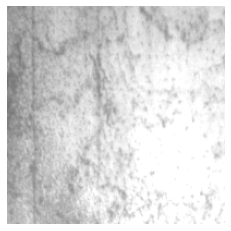

----------------------------------
La posición de la imagen a mostrar es la 5057
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


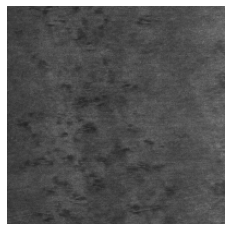

----------------------------------
La posición de la imagen a mostrar es la 10
La etiqueta de la imagen es: 3
Etiqueta: [0. 0. 0. 1. 0. 0.]
Predicción: [0. 0. 0. 1. 0. 0.]


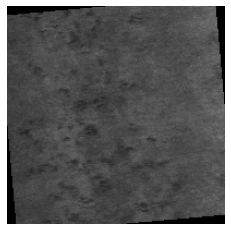

----------------------------------
La posición de la imagen a mostrar es la 1880
La etiqueta de la imagen es: 0
Etiqueta: [1. 0. 0. 0. 0. 0.]
Predicción: [1. 0. 0. 0. 0. 0.]


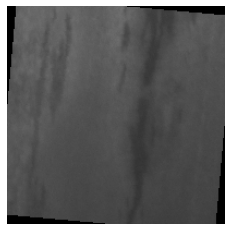

In [ ]:


for i in range(70):
    numero = np.random.randint(low = 0, high = 5060)
    print(f'----------------------------------')

    print(f'La posición de la imagen a mostrar es la {numero}')
    print(f'La etiqueta de la imagen es: {y_train[numero]}')
    
    print(f'Etiqueta: {y_train_c[numero]}')
    print(f'Predicción: {np.round(Predicciones_MNIST[numero], decimals = 3)}')
    plt.imshow(X_train[numero, :, :], cmap = 'gray')
    plt.axis('off')
    plt.show()



17/17 [==============================] - 0s 6ms/step


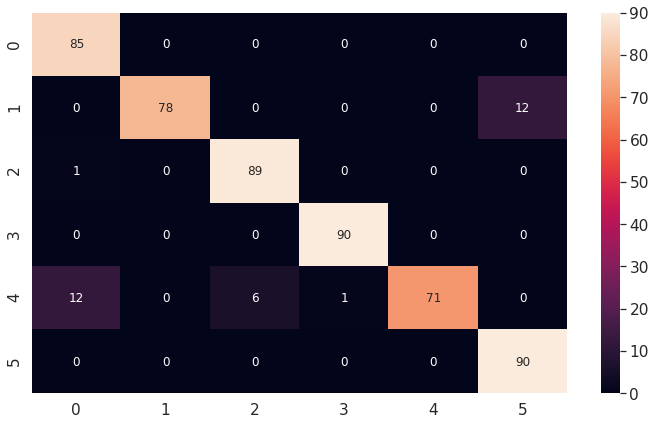

In [ ]:
#Graficamos la matriz de confusion

#calculamos las predicciones para crear la matriz de confusion
Y_pred=Red_Neuronal.predict(X_test,batch_size=32,verbose=1)
Y_predicted=np.argmax(Y_pred,axis=1)

#Calculamos la matriz de confusion
cm=confusion_matrix(np.argmax(y_test_c,axis=1),Y_predicted)

#visualizamos la matriz de confusion con seaborn

df_cm=pd.DataFrame(cm,range(6),range(6))
plt.figure(figsize=(12,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm,annot=True,annot_kws={'size':12})
plt.show()

In [ ]:
#mostramos las metricas
Y_report=classification_report(np.argmax(y_test_c, axis=1), Y_predicted)
print(Y_report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        85
           1       1.00      0.87      0.93        90
           2       0.94      0.99      0.96        90
           3       0.99      1.00      0.99        90
           4       1.00      0.79      0.88        90
           5       0.88      1.00      0.94        90

    accuracy                           0.94       535
   macro avg       0.95      0.94      0.94       535
weighted avg       0.95      0.94      0.94       535

